#upload data from kaggle


In [396]:
#!pip install -q kaggle

In [397]:
#from google.colab import files
#files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mernamansour95","key":"07a87b915766c812c294e39792463ac9"}'}

In [398]:
#!mkdir ~/.kaggle


In [399]:
#!cp kaggle.json ~/.kaggle/

In [400]:
#! chmod 600 ~/.kaggle/kaggle.json

In [401]:
#!kaggle datasets download -d stefanoleone992/fifa-23-complete-player-dataset

Dataset URL: https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset
License(s): CC0-1.0
100% 1.58G/1.58G [03:36<00:00, 9.31MB/s]
100% 1.58G/1.58G [03:37<00:00, 7.79MB/s]


#unzip dataset

In [402]:
'''from zipfile import ZipFile
File_name='/content/fifa-23-complete-player-dataset.zip'
with ZipFile(File_name,'r') as zip:
   zip.extractall()
   print('done')'''

KeyboardInterrupt: 

#Import libraries



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#Read data


In [3]:
df=pd.read_csv(r'/content/fifa_eda_stats.csv')

In [4]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [6]:
df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


#Check duplicates

In [7]:
df.duplicated()# no duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
18202,False
18203,False
18204,False
18205,False


#Handling null values


In [8]:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,241
Value,0
Wage,0
Preferred Foot,48


In [9]:

df['Club'].fillna(df['Club'].mode()[0],inplace=True) #fill the null values of club with the mode

In [10]:
df.isnull().sum()


,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,0
Value,0
Wage,0
Preferred Foot,48


In [11]:
df.dropna(subset=['Preferred Foot'],inplace=True)

In [12]:
df.isnull().sum()


,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,0
Value,0
Wage,0
Preferred Foot,0


note:all null values were common so when i dropped the Preferred Foot all null values were
 dropped also

In [13]:
df.dropna(subset=['Jersey Number'],inplace=True)
#drop jersey number because we can't estimate the jersey number of each player

In [14]:
df.isnull().sum()
#position and jersey number were common in null values

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,0
Value,0
Wage,0
Preferred Foot,0


In [15]:
#drop loaned from column
df=df.drop(['Loaned From'], axis=1)

In [16]:
df.isnull().sum()


,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,0
Value,0
Wage,0
Preferred Foot,0


In [17]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [18]:
df['Joined'] = df['Joined'].dropna().astype('int64').mean()

In [19]:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,0
Value,0
Wage,0
Preferred Foot,0


In [20]:
#function to convert the Release Clause values into float instead of str
def convert_to_float(value):

    value = str(value)

    # Remove the euro sign
    value = value.replace('€', '')

    # Handle 'K' and 'M' suffixes
    if 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif "'" in value:
      return float(value.replace("'", '.'))
    elif 'lbs' in value:
      return float(value.replace('lbs', ''))
    else:
        return float(value)  # Handle plain numbers if they exist





In [21]:
def convert_to_date(value):
    return pd.to_datetime(value, errors='coerce')

In [22]:
df['Contract Valid Until'] = df['Contract Valid Until'].apply(convert_to_date)

In [23]:
df['Height'] = df['Height'].apply(convert_to_float)#convert the value from str to float

In [24]:
df['Weight'] = df['Weight'].apply(convert_to_float)

In [25]:
df['Wage'] = df['Wage'].apply(convert_to_float)

In [26]:
df['Value'] = df['Value'].apply(convert_to_float)

In [27]:
df['Release Clause'] = df['Release Clause'].apply(convert_to_float)

In [28]:
df['Release Clause'].fillna(df['Release Clause'].mean(),inplace=True)

In [29]:
#fill Contract Valid Until by mode
df['Contract Valid Until'].fillna(df['Contract Valid Until'].mode()[0],inplace=True)

In [30]:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,0
Value,0
Wage,0
Preferred Foot,0


Handling null values are done

# Encoding catagorical data

In [31]:
#apply one hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [32]:
categorical_columns

Index(['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Position'],
      dtype='object')

In [33]:
df_encoded.head()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,158023,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,10.0,...,False,False,False,False,True,False,False,False,False,False
1,20801,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,7.0,...,False,False,False,False,False,False,False,False,False,True
2,190871,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,10.0,...,False,False,False,False,False,False,False,False,False,False
3,193080,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,192985,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,7.0,...,False,False,True,False,False,False,False,False,False,False


#scaling numerical data

In [34]:
scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

In [35]:
numerical_columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Joined', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [36]:
df_scaled.head()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0.640732,0.517241,1.000000,0.978723,0.932489,1.000000,1.00,0.75,0.75,0.091837,...,1.000000,0.329670,0.285714,0.261364,0.056180,0.109890,0.155556,0.146067,0.075269,0.992985
1,0.084285,0.586207,1.000000,0.978723,0.649789,0.716814,1.00,0.75,1.00,0.061224,...,0.989247,0.274725,0.318681,0.227273,0.067416,0.109890,0.155556,0.146067,0.107527,0.557187
2,0.773933,0.344828,0.958333,0.957447,1.000000,0.513274,1.00,1.00,1.00,0.091837,...,0.978495,0.263736,0.241758,0.340909,0.089888,0.087912,0.155556,0.157303,0.107527,1.000000
3,0.782891,0.379310,0.937500,0.957447,0.607595,0.460177,0.75,0.50,0.00,0.000000,...,0.698925,0.131868,0.208791,0.113636,1.000000,0.923077,0.955556,0.977528,1.000000,0.607606
4,0.782506,0.379310,0.937500,0.936170,0.860759,0.628319,0.75,1.00,0.75,0.061224,...,0.913978,0.714286,0.615385,0.545455,0.157303,0.131868,0.044444,0.101124,0.129032,0.861018


#Univarent Analysis

<Axes: ylabel='Age'>

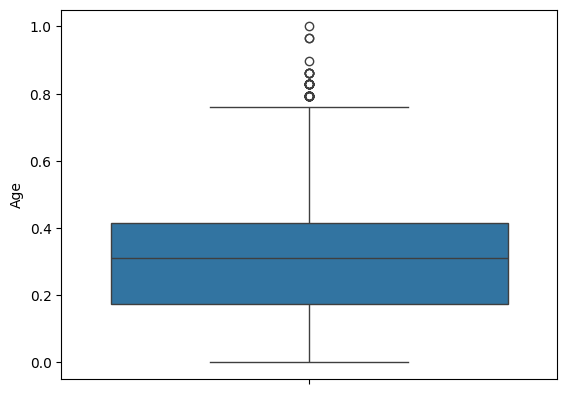

In [37]:
sns.boxplot(df_scaled['Age'])
#age after data preprcessing

<Axes: ylabel='Age'>

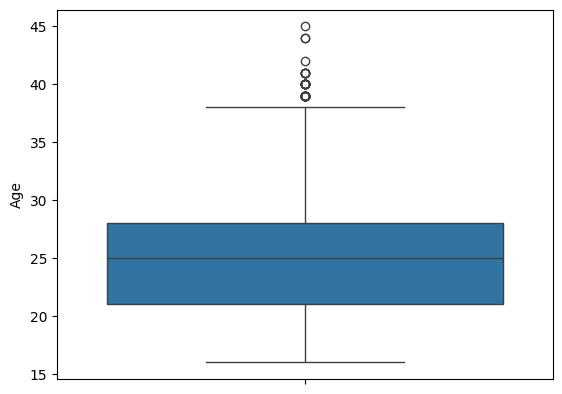

In [38]:
sns.boxplot(df['Age'])#age bedore preprocessing

In [39]:
i_Age=df[df['Age']>=39].index
df.drop(i_Age,inplace=True)
#drop the outliers

<Axes: ylabel='Age'>

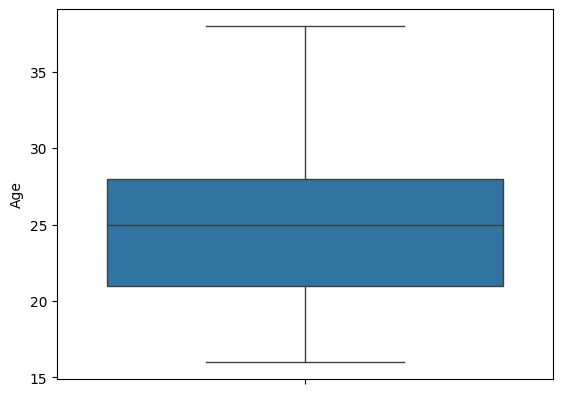

In [40]:
sns.boxplot(df['Age'])

<Axes: xlabel='Wage', ylabel='Count'>

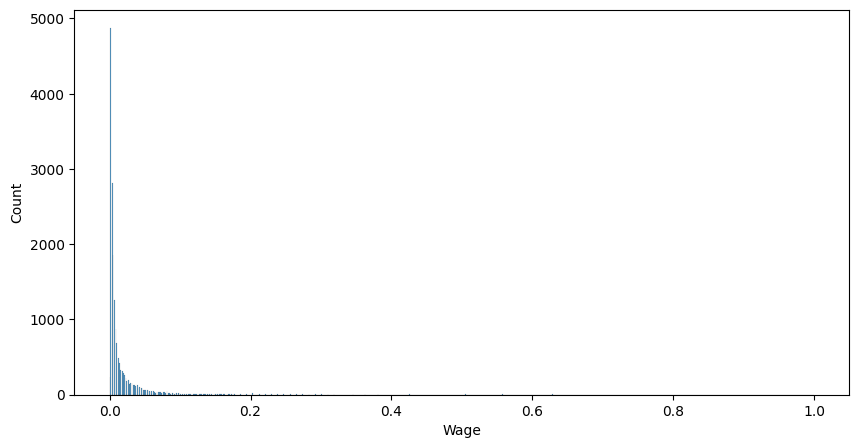

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(df_scaled['Wage'])

<Axes: xlabel='Overall', ylabel='Count'>

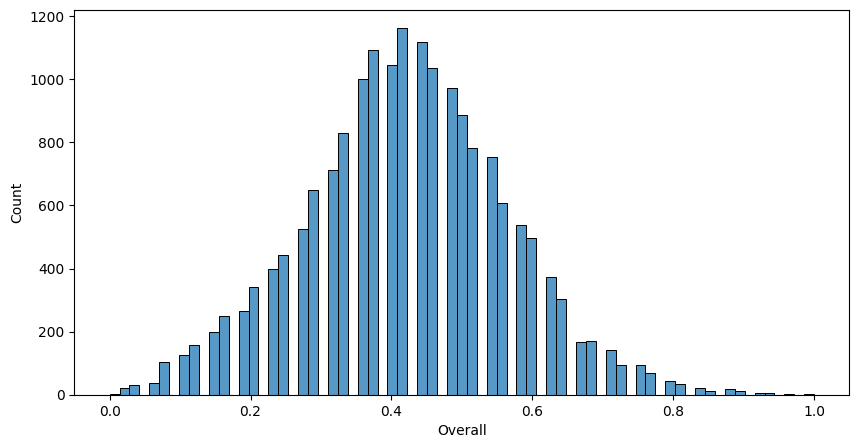

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df_scaled['Overall'])

<Axes: ylabel='Overall'>

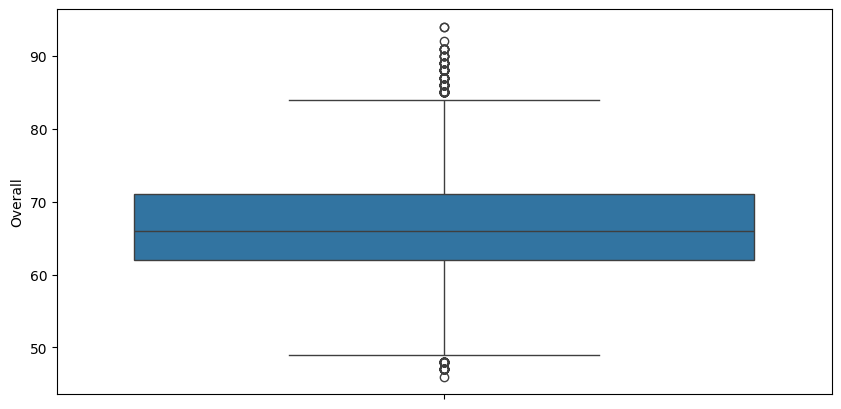

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Overall'])
#before processing there were outliers

<Axes: xlabel='Overall', ylabel='Count'>

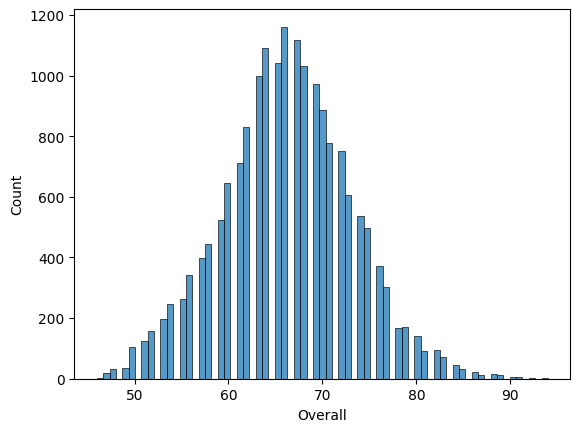

In [44]:
sns.histplot(df['Overall'])
#before scaling

<Axes: ylabel='Overall'>

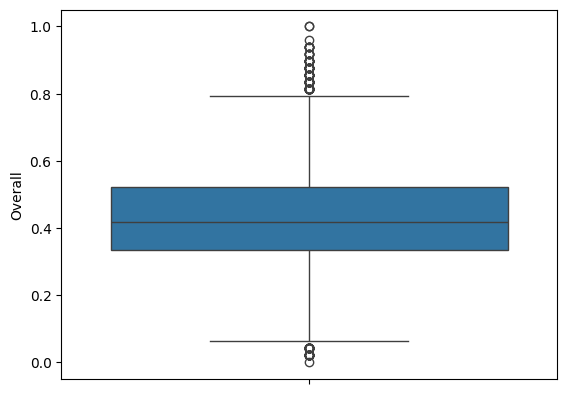

In [45]:

sns.boxplot(df_scaled['Overall'])
#after scaling


In [46]:
i_overall=df_scaled[df_scaled['Overall']>=0.8].index
df_scaled.drop(i_overall,inplace=True)
i_overall=df_scaled[df_scaled['Overall']<=0.05].index
df_scaled.drop(i_overall,inplace=True)
#drop the outliers

<Axes: ylabel='Overall'>

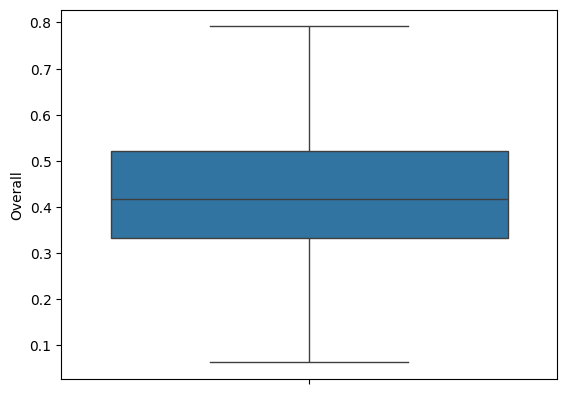

In [47]:
sns.boxplot(df_scaled['Overall'])
#after scaling


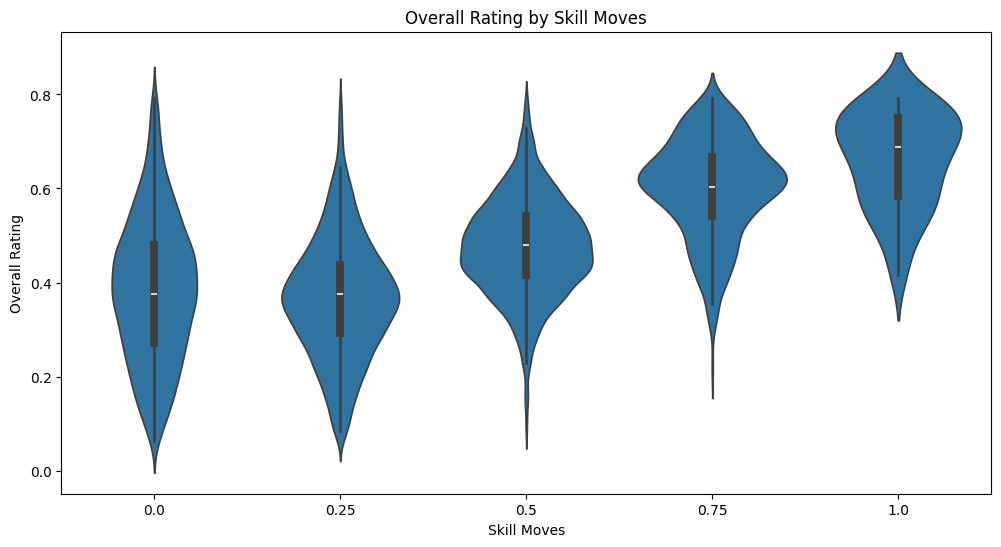

In [48]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Skill Moves', y='Overall', data=df_scaled)
plt.title('Overall Rating by Skill Moves')
plt.xlabel('Skill Moves')
plt.ylabel('Overall Rating')
plt.show()
#overall rating increase with increase the skill moves

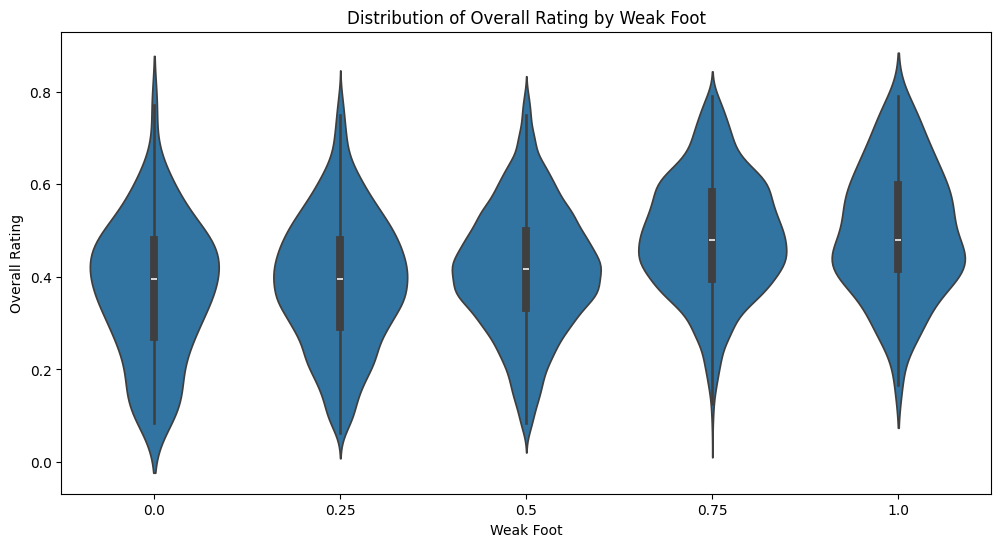

In [49]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Weak Foot', y='Overall', data=df_scaled)
plt.title('Distribution of Overall Rating by Weak Foot')
plt.xlabel('Weak Foot')
plt.ylabel('Overall Rating')
plt.show()


<Axes: xlabel='Potential', ylabel='count'>

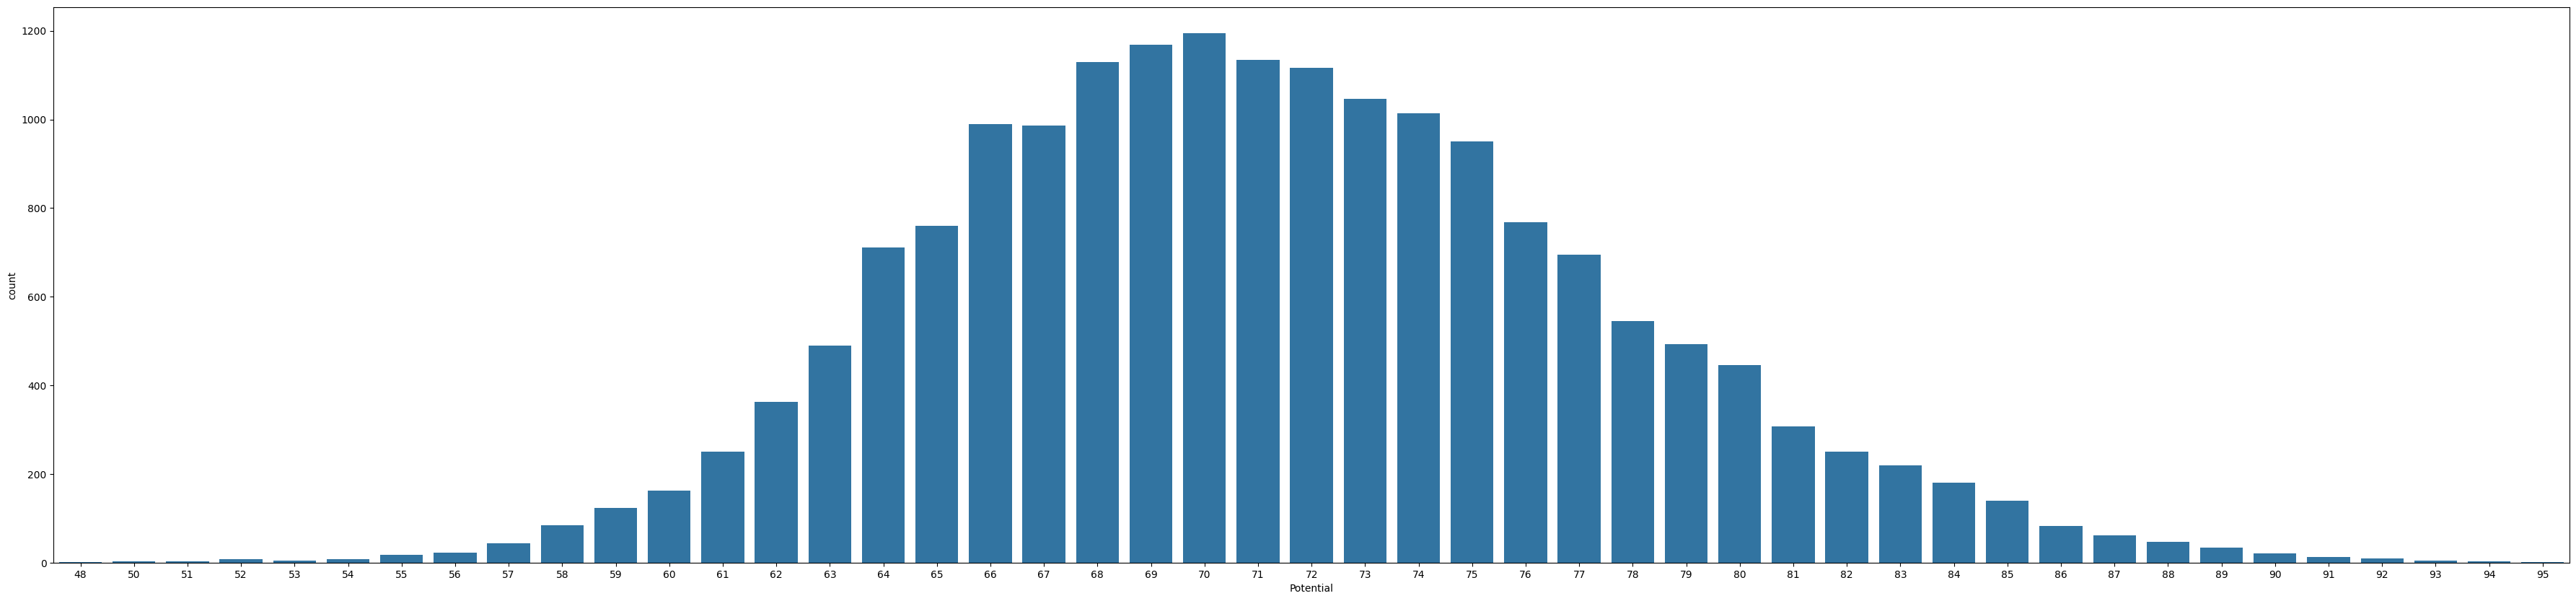

In [50]:
plt.figure(figsize=(45,10))
sns.countplot(x=df['Potential'])

<Axes: ylabel='Potential'>

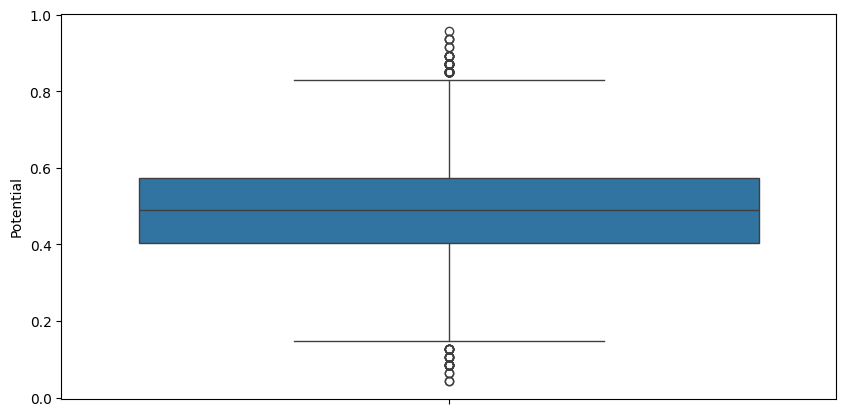

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(df_scaled['Potential'])

<Axes: xlabel='Preferred Foot', ylabel='count'>

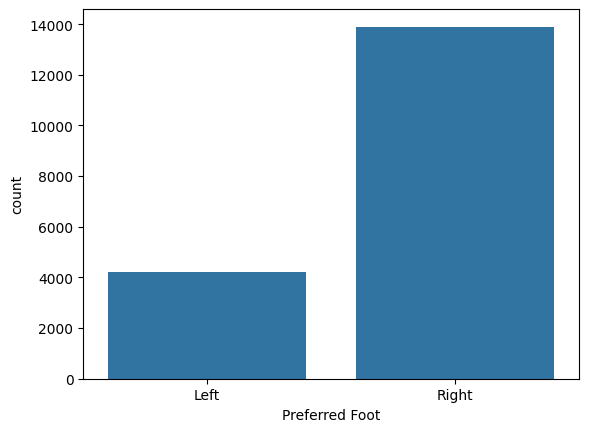

In [52]:
sns.countplot(x=df['Preferred Foot'])
# The right foot is the most commonly used foot by players.

<Axes: xlabel='International Reputation', ylabel='count'>

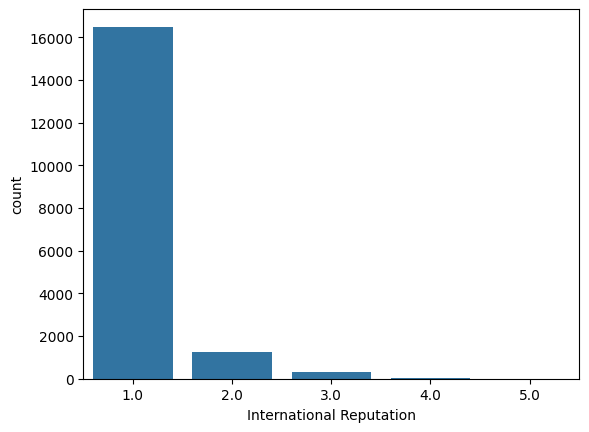

In [53]:
sns.countplot(x=df['International Reputation'])
# the most international reputation is 1

<Axes: xlabel='Position', ylabel='count'>

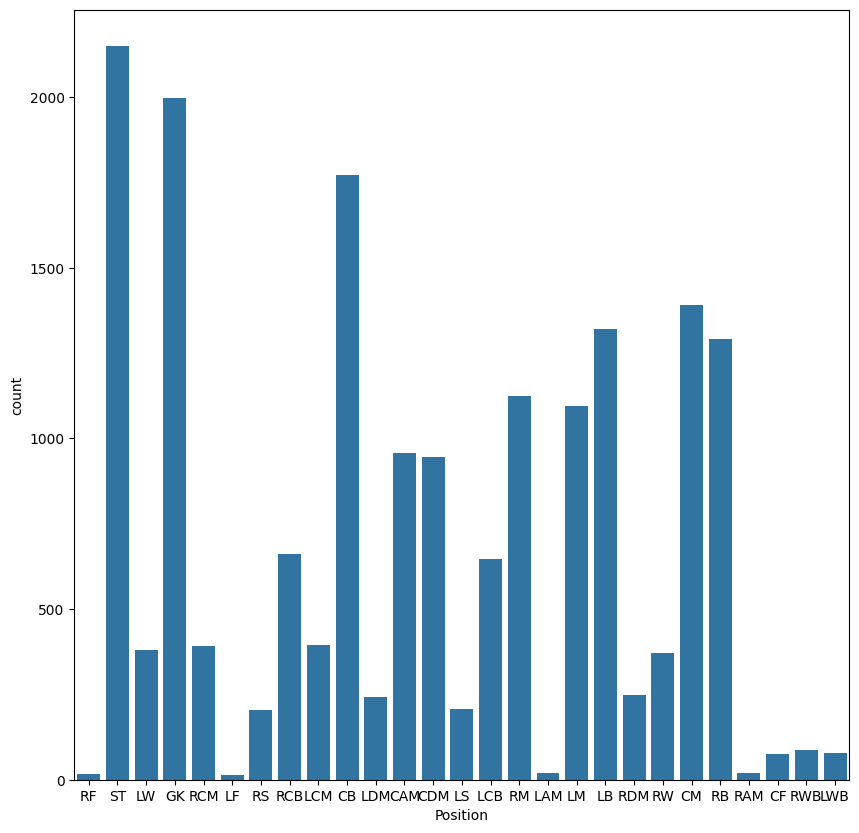

In [54]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Position'])

#this plot illustare the numbers of each position and from this plot we indecate that ST is the most position of players

<Axes: xlabel='Contract Valid Until', ylabel='count'>

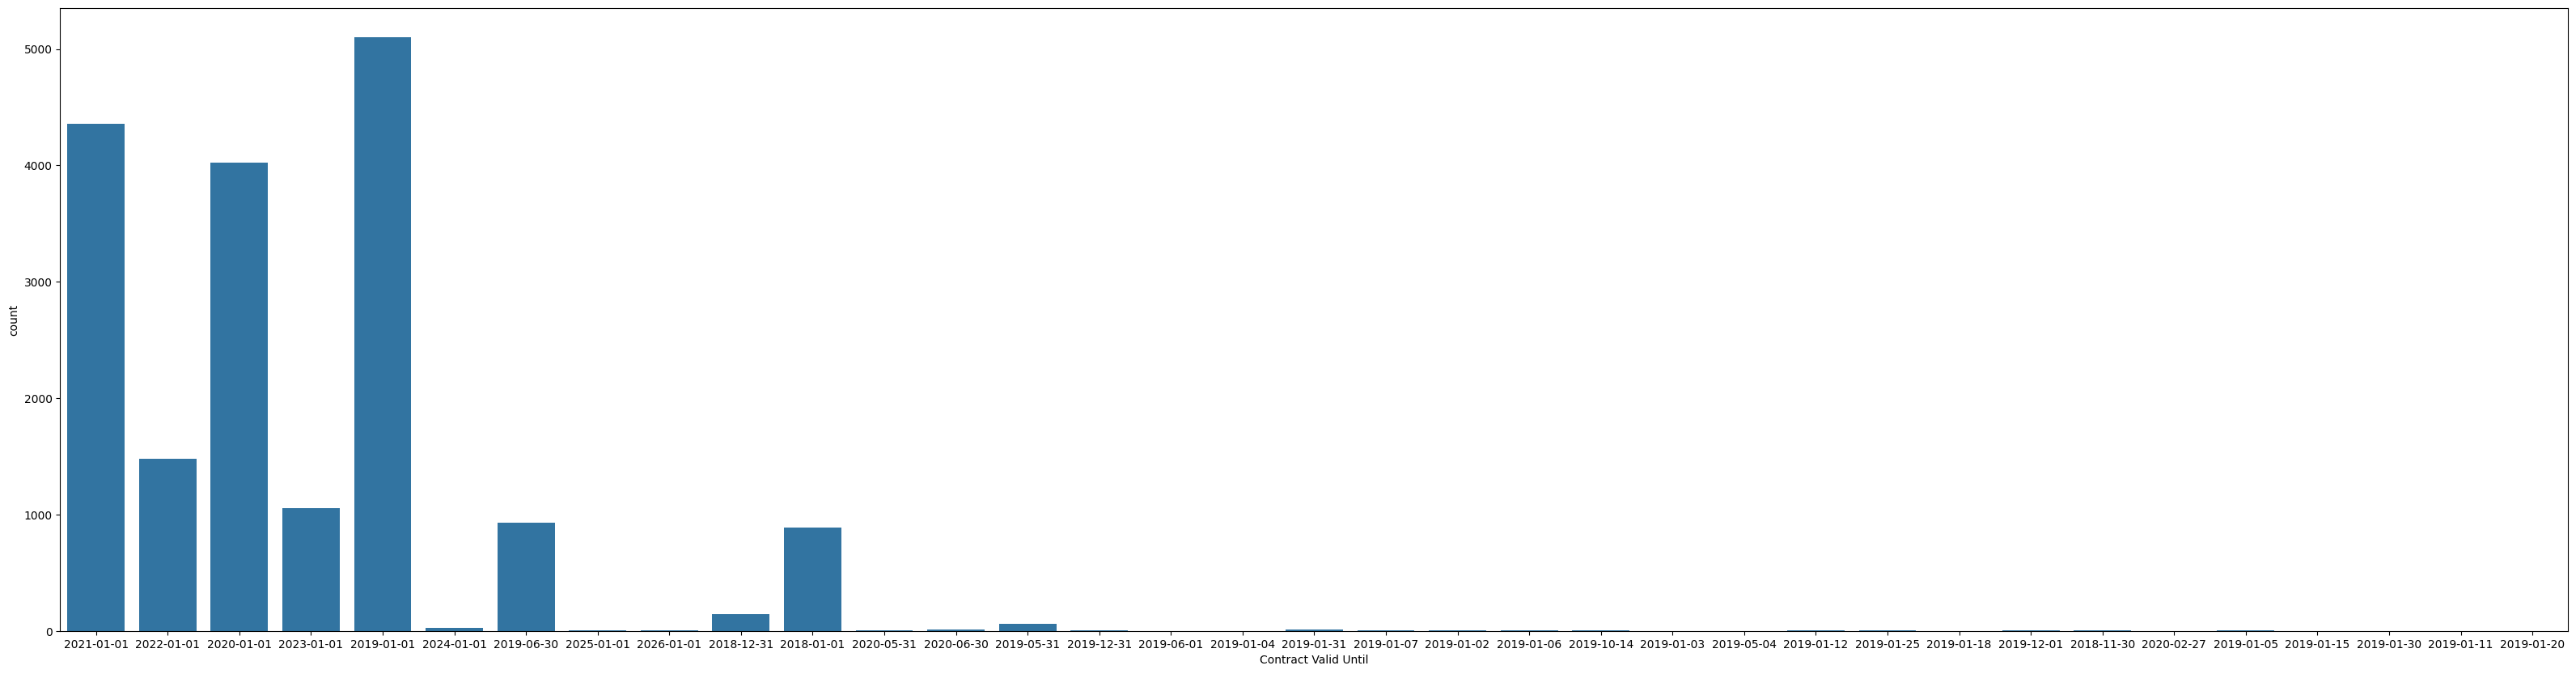

In [55]:
plt.figure(figsize=(40,10))
sns.countplot(x=df_encoded['Contract Valid Until'])
#most players signed contrancts untill 2019


<Axes: ylabel='Height'>

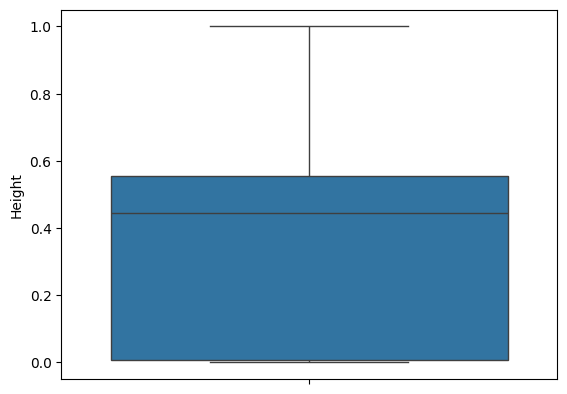

In [56]:
sns.boxplot(df_scaled['Height'])
#after scaling the height average height is about 3.9

<Axes: ylabel='Height'>

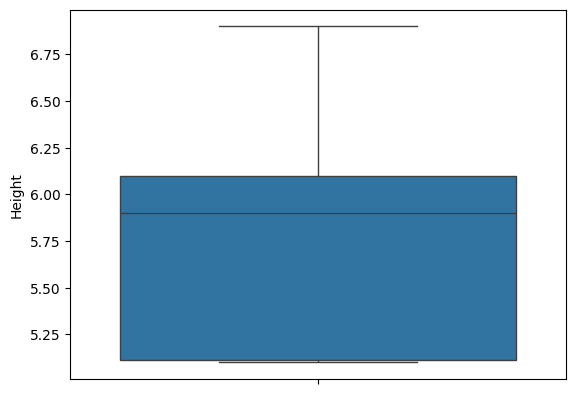

In [57]:

sns.boxplot(df['Height'])
#before scaling

average height is 5.80

In [58]:
df_scaled['Height'].mean()#check the value

0.3872788157374457

<Axes: xlabel='Weight', ylabel='Count'>

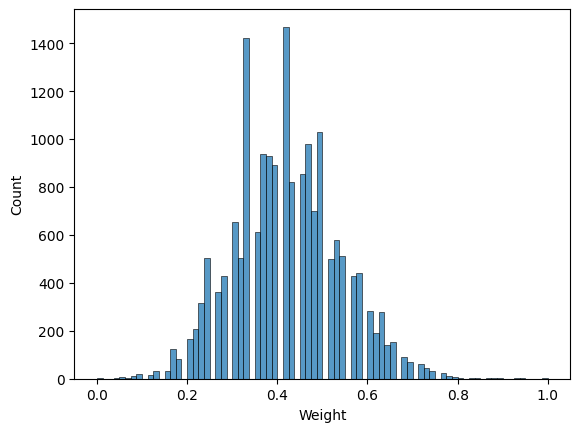

In [59]:
sns.histplot(df_scaled['Weight'])

In [60]:
df['Weight'].mean()

165.95723756906077

<Axes: ylabel='Weight'>

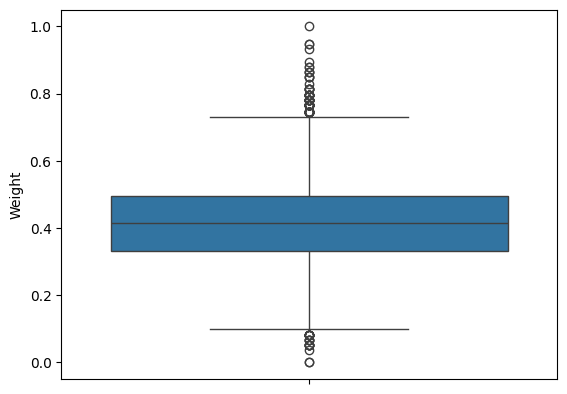

In [61]:
sns.boxplot(df_scaled['Weight'])

In [62]:
#drop the outlier weights
i_Weight=df_scaled[df_scaled['Weight']>=0.7 ].index
df_scaled.drop(i_Weight,inplace=True)
i_Weight=df_scaled[df_scaled['Weight']<=0.1 ].index
df_scaled.drop(i_Weight,inplace=True)


<Axes: ylabel='Weight'>

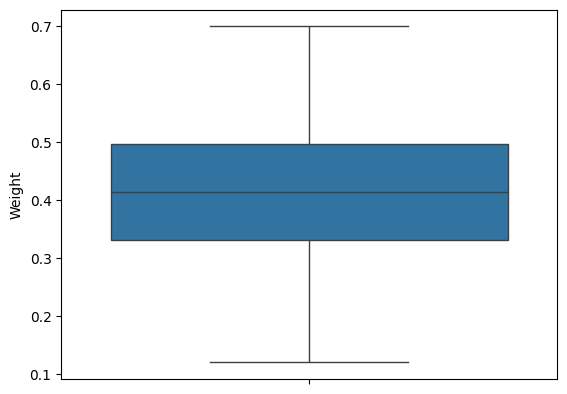

In [63]:
sns.boxplot(df_scaled['Weight'])

<Axes: ylabel='Crossing'>

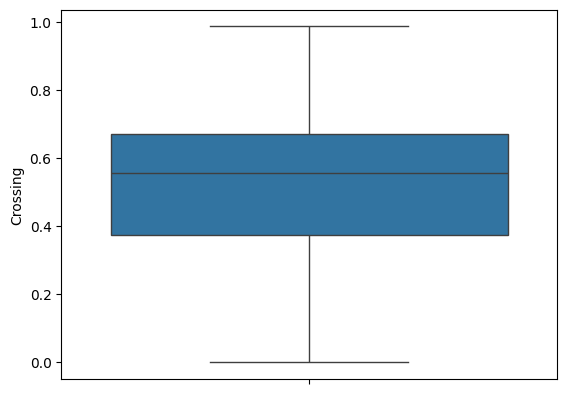

In [64]:
sns.boxplot(df_scaled['Crossing'])
#the average cossing is about 50(0.5)

In [65]:
df_scaled['Crossing'].mean() #check the mean

0.5105900945667654

<Axes: ylabel='Finishing'>

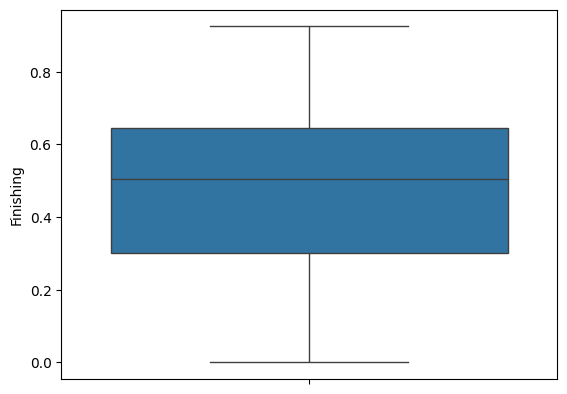

In [66]:
sns.boxplot(df_scaled['Finishing'])#finishing average is 45 most players finishing score is 45

<Axes: xlabel='HeadingAccuracy', ylabel='Count'>

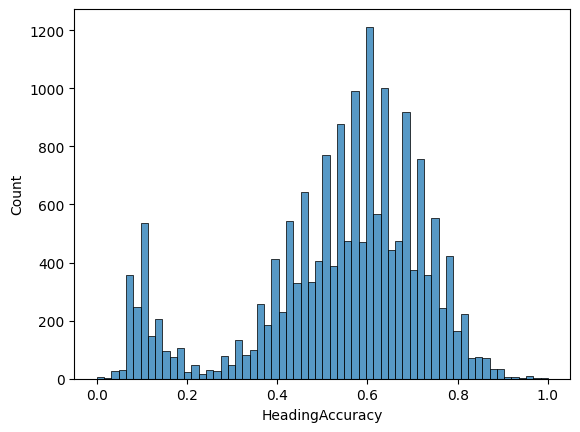

In [67]:
sns.histplot(df_scaled['HeadingAccuracy'])

In [68]:
#drop the outlier weights
i_Weight=df_scaled[df_scaled['HeadingAccuracy']>=0.94 ].index
df_scaled.drop(i_Weight,inplace=True)
i_Weight=df_scaled[df_scaled['HeadingAccuracy']<=0.24 ].index
df_scaled.drop(i_Weight,inplace=True)


<Axes: ylabel='HeadingAccuracy'>

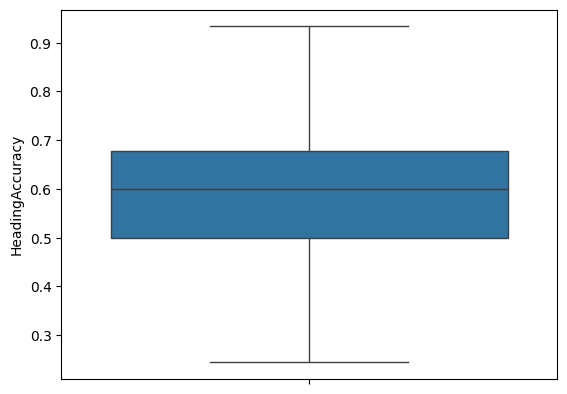

In [69]:
sns.boxplot(df_scaled['HeadingAccuracy'])#most heading accuracy of players is 53

In [70]:
df_scaled['HeadingAccuracy'].mean()#average changed after remove outliers (before removing was 53 now is 58.85)

0.5885001722162474

<Axes: xlabel='ShortPassing', ylabel='Count'>

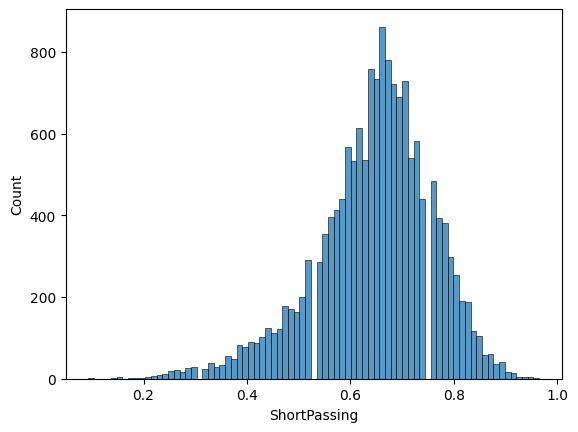

In [71]:
sns.histplot(df_scaled['ShortPassing'])

<Axes: ylabel='ShortPassing'>

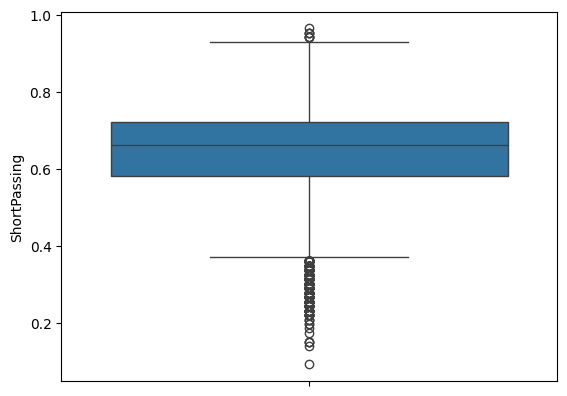

In [72]:
sns.boxplot(df_scaled['ShortPassing'])

In [73]:
#drop the outlier weights
i_Weight=df_scaled[df_scaled['ShortPassing']>=0.95 ].index
df_scaled.drop(i_Weight,inplace=True)
i_Weight=df_scaled[df_scaled['ShortPassing']<=0.38 ].index
df_scaled.drop(i_Weight,inplace=True)


<Axes: ylabel='ShortPassing'>

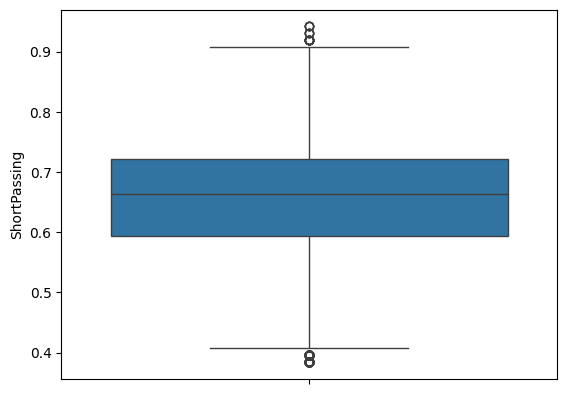

In [74]:
sns.boxplot(df_scaled['ShortPassing'])

#MultiVarient

<Axes: xlabel='Age', ylabel='Wage'>

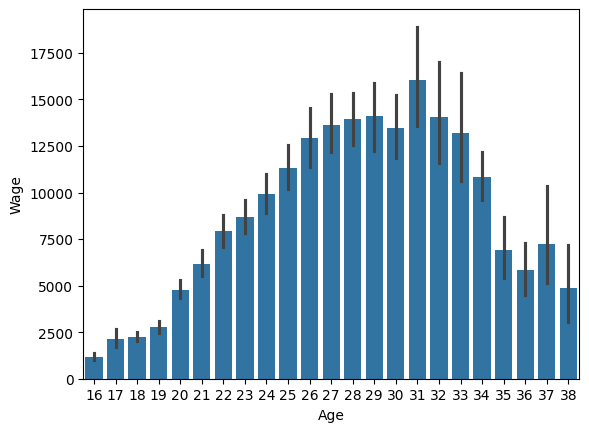

In [75]:
sns.barplot(x='Age', y='Wage', data=df)
#playes at 32 ,28 and27 take the highest wages

<Axes: xlabel='International Reputation', ylabel='Wage'>

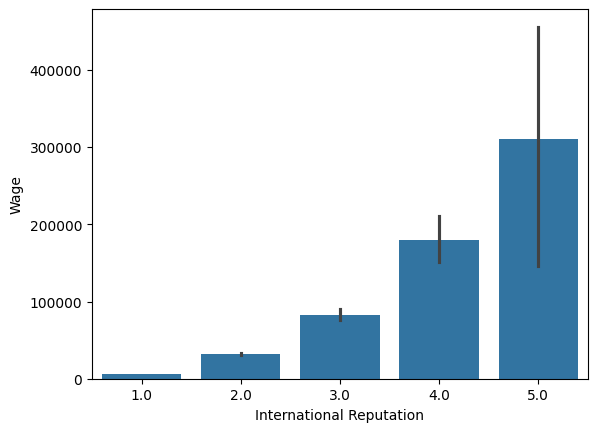

In [76]:
sns.barplot(x='International Reputation', y='Wage', data=df)
#the highest international reputation players take the highest wage

<Axes: xlabel='Preferred Foot', ylabel='Weak Foot'>

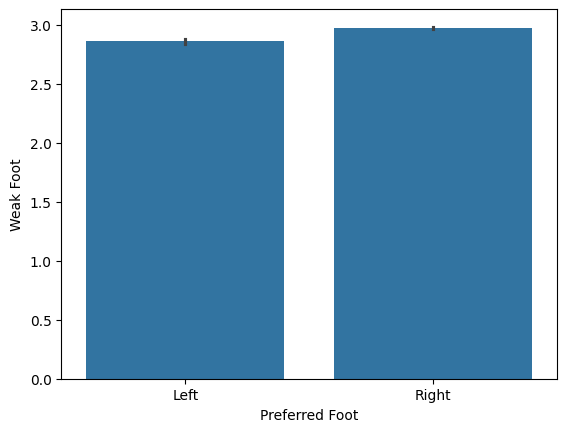

In [77]:
sns.barplot(x=df['Preferred Foot'], y=df['Weak Foot'])


<Axes: xlabel='Preferred Foot', ylabel='Skill Moves'>

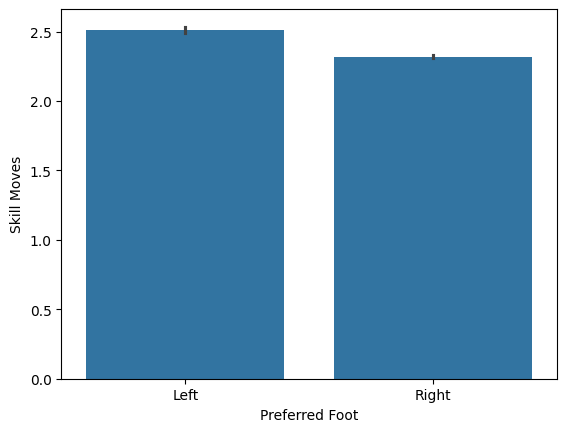

In [78]:
sns.barplot(x='Preferred Foot', y='Skill Moves', data=df)
#the player who plays with the left foot has skill moves above the player plays by the right one

<Axes: ylabel='Dribbling'>

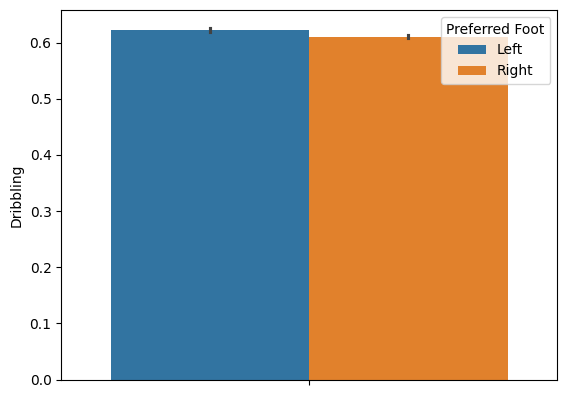

In [79]:
sns.barplot(y=df_scaled['Dribbling'], hue=df['Preferred Foot'])
#players who play with left leg has dribbling skills higher than who play with right one

<Axes: ylabel='Curve'>

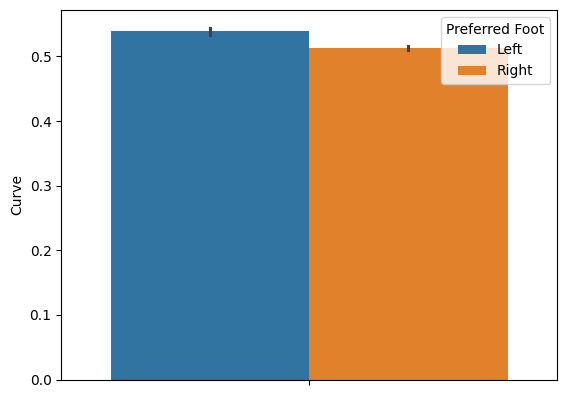

In [80]:

sns.barplot(y=df_scaled['Curve'], hue=df['Preferred Foot'])
#and also the curve (conclusion the player who plays with the left leg has more skills than who preferred the right foot)
#and also it could be estimated from the graphical represntation between skill moves and preferred foot

<Axes: xlabel='Position', ylabel='count'>

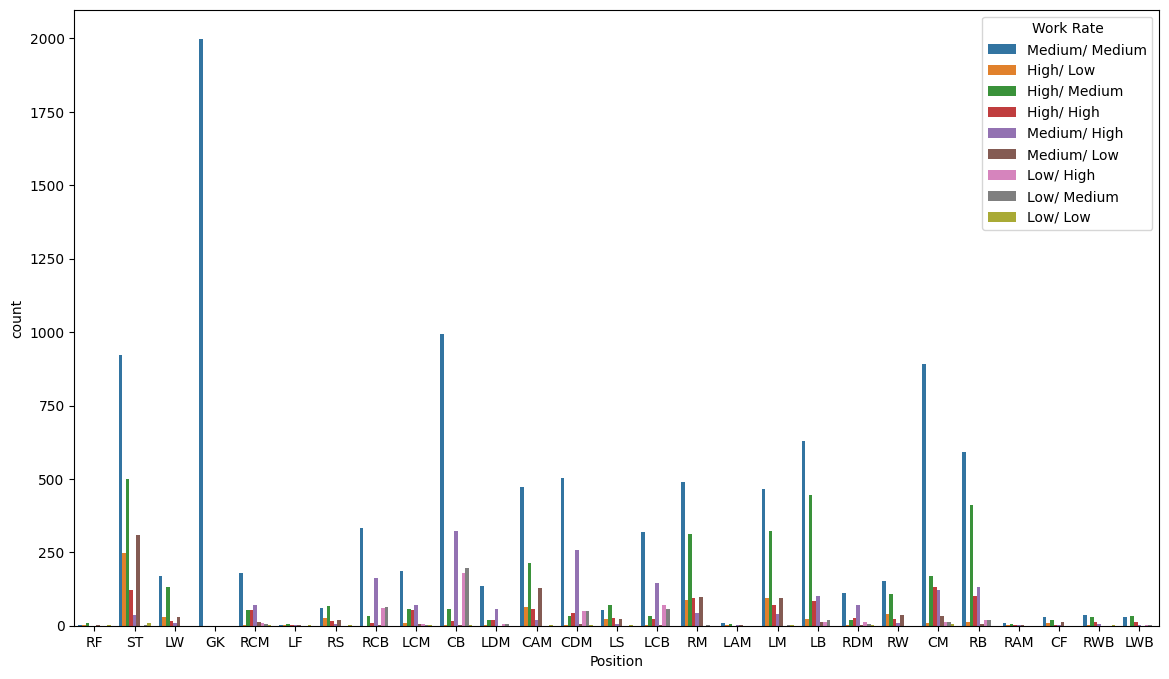

In [81]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Position', hue='Work Rate', data=df)
#work rate medium/medium is the common in all positions

<Axes: ylabel='Position_LCM'>

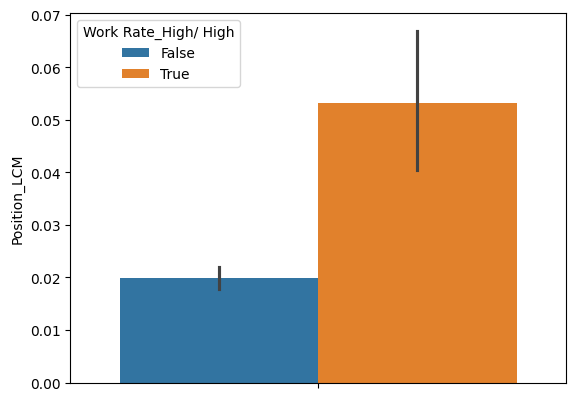

In [82]:

sns.barplot(y=df_encoded['Position_LCM'], hue=df_encoded['Work Rate_High/ High'])
#the player whose work rate high high his position probably LCM

<Axes: xlabel='Preferred Foot', ylabel='count'>

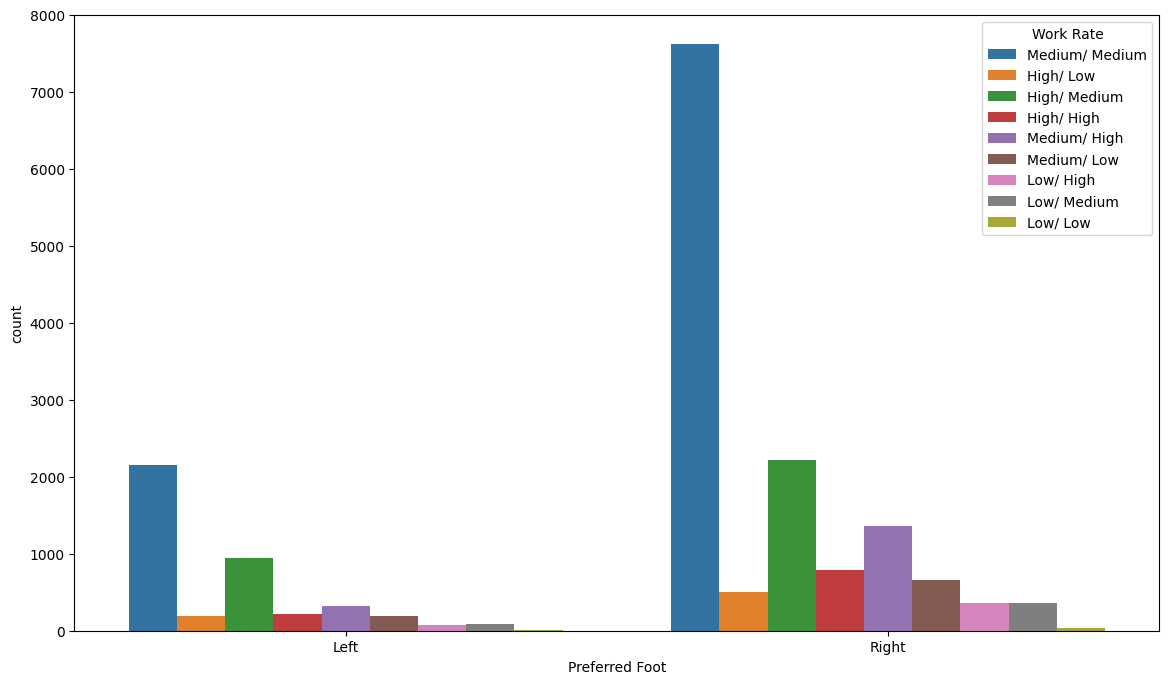

In [83]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Preferred Foot', hue='Work Rate', data=df)
#the workrate of players who use the right and left leg

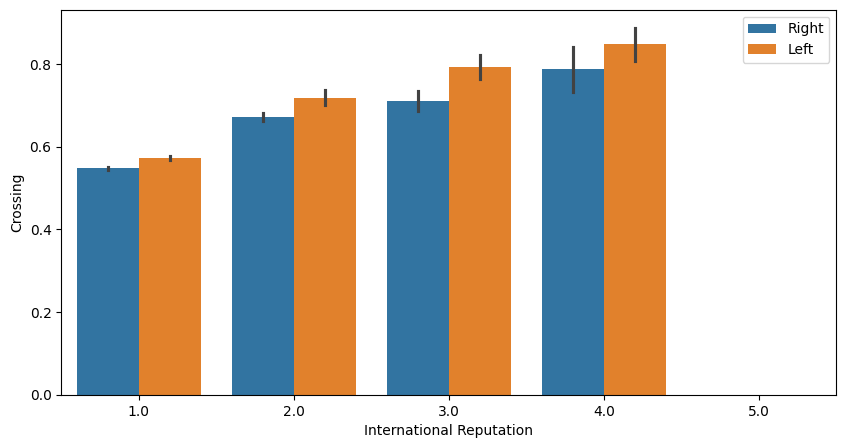

In [84]:
plt.figure(figsize=(10, 5))
sns.barplot(x='International Reputation',y=df_scaled['Crossing'], hue='Preferred Foot', data=df)
plt.legend()
plt.show()
#most famous players that play with left foot have crossing skills higher than that play with right foot

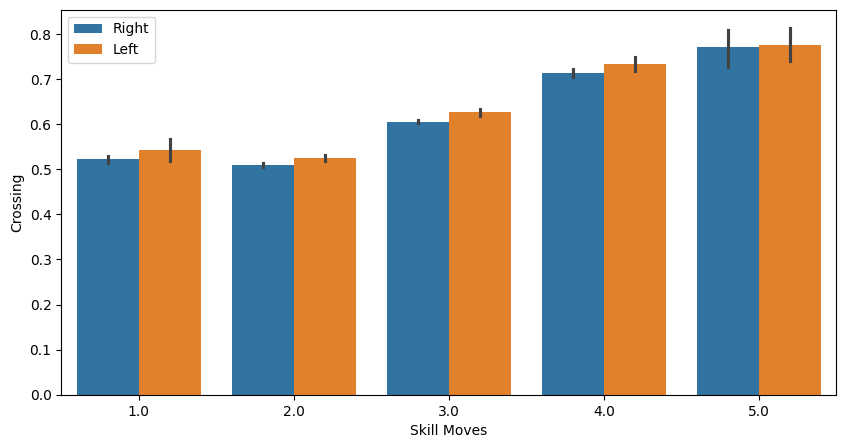

In [85]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Skill Moves',y=df_scaled['Crossing'], hue='Preferred Foot', data=df)
plt.legend()
plt.show()
#player who play with right have kill moves and crossing score higher than who play with the right one

<Axes: xlabel='count', ylabel='ShortPassing'>

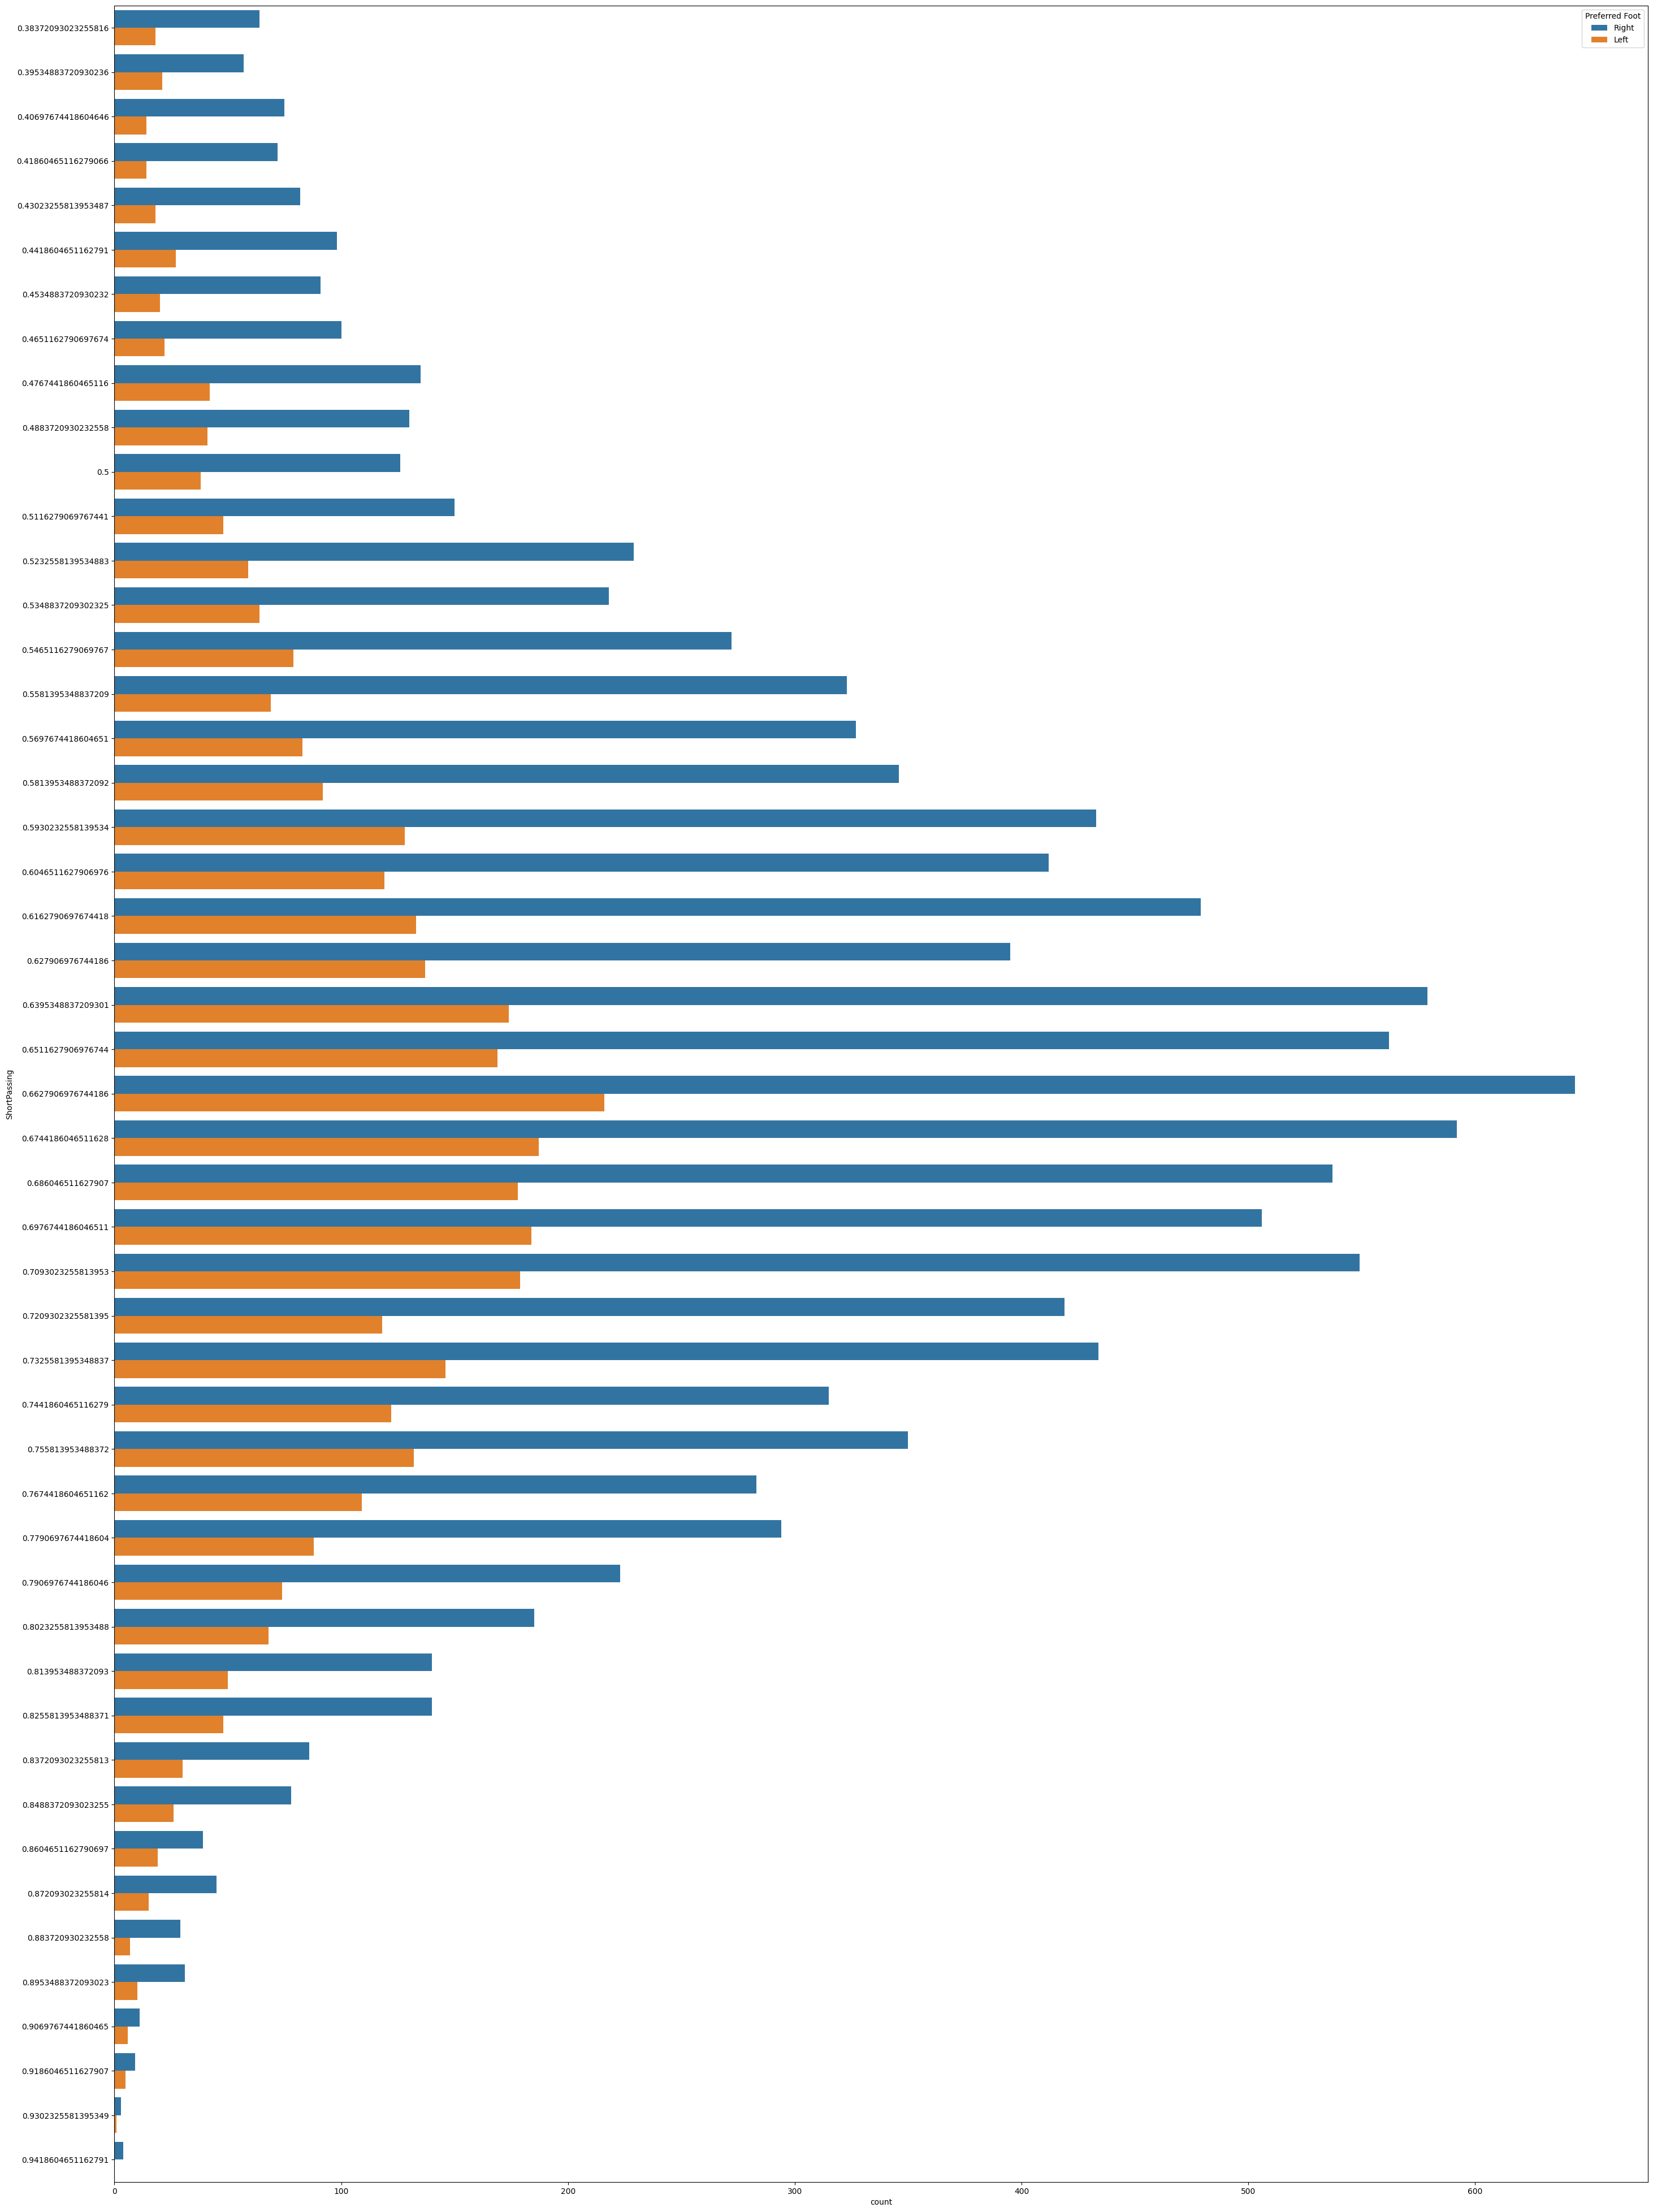

In [86]:
plt.figure(figsize=(35, 50))
sns.countplot(hue='Preferred Foot', y=df_scaled['ShortPassing'], data=df)
#left legs are efficient in short passing

<Axes: xlabel='count', ylabel='LongPassing'>

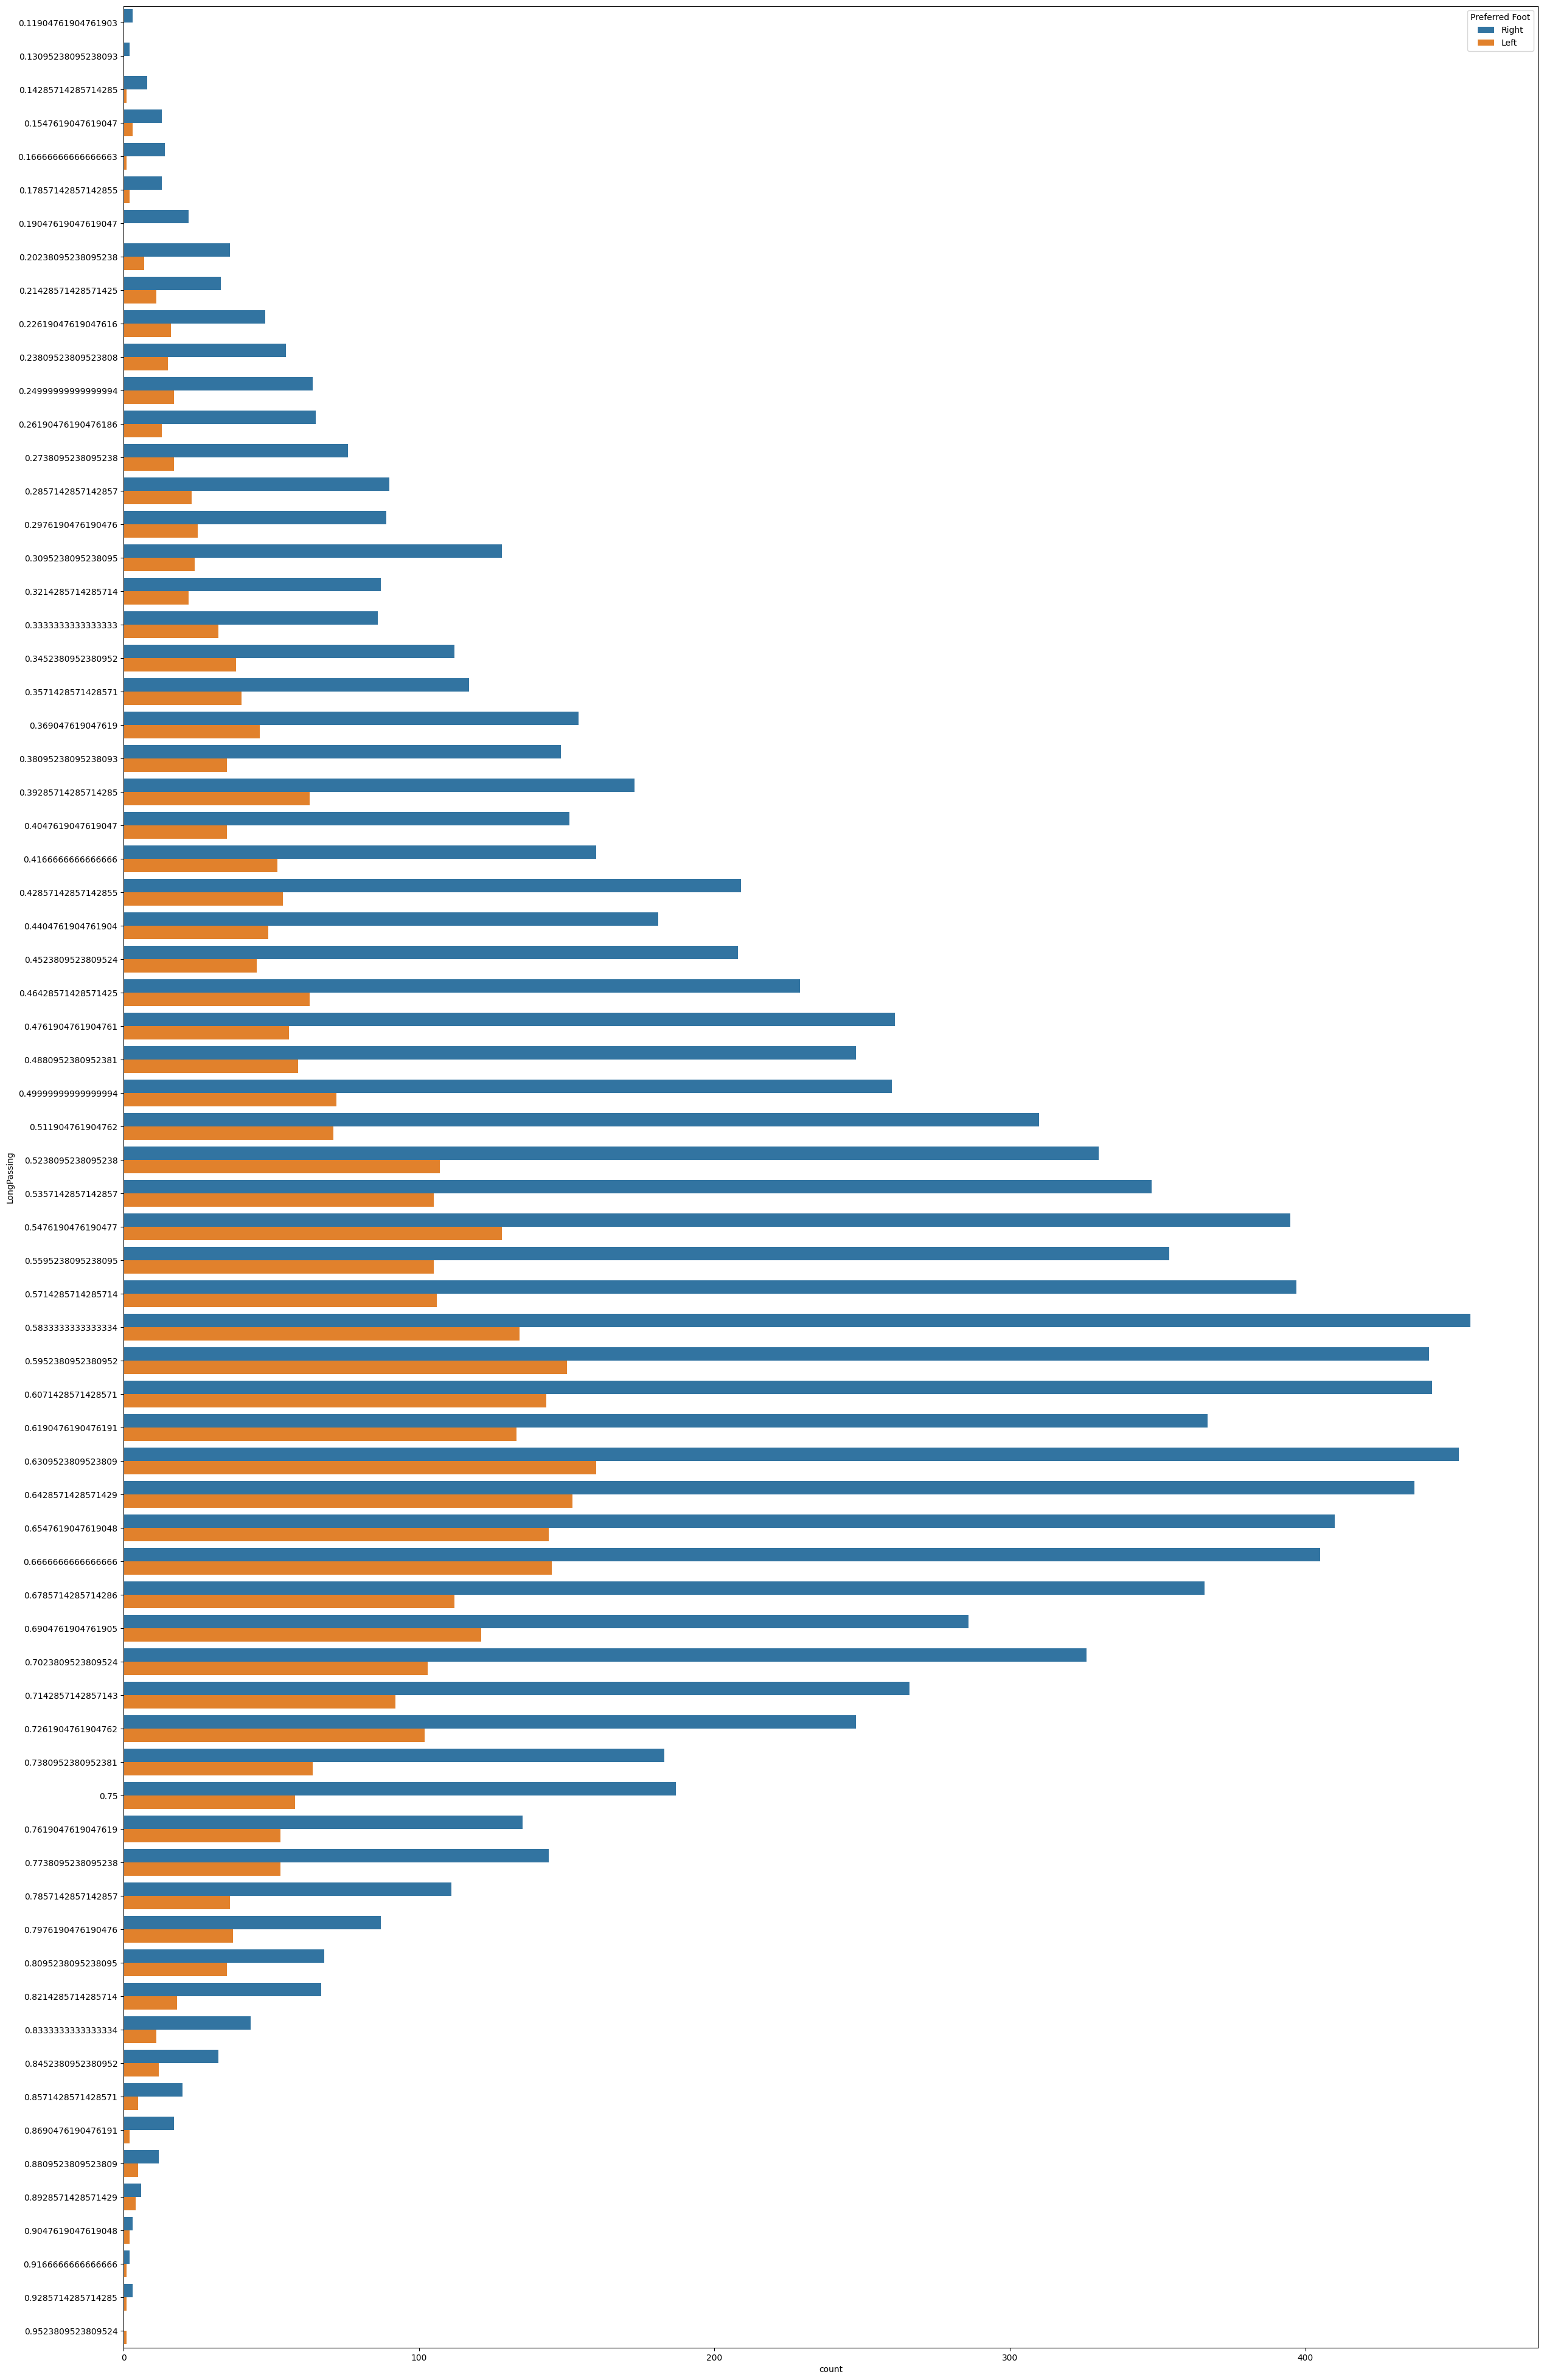

In [87]:

plt.figure(figsize=(30, 50))
sns.countplot(hue='Preferred Foot', y=df_scaled['LongPassing'], data=df)
#right legs are more efficient in longpassing

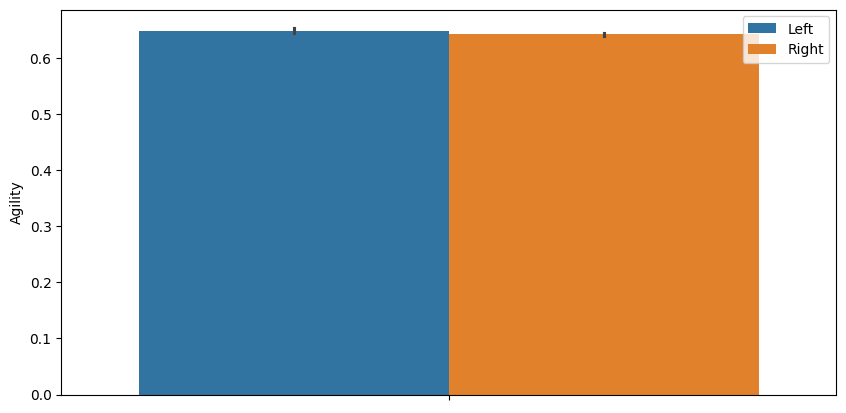

In [88]:
plt.figure(figsize=(10, 5))
sns.barplot(y=df_scaled['Agility'],hue='Preferred Foot', data=df)
plt.legend()
plt.show()

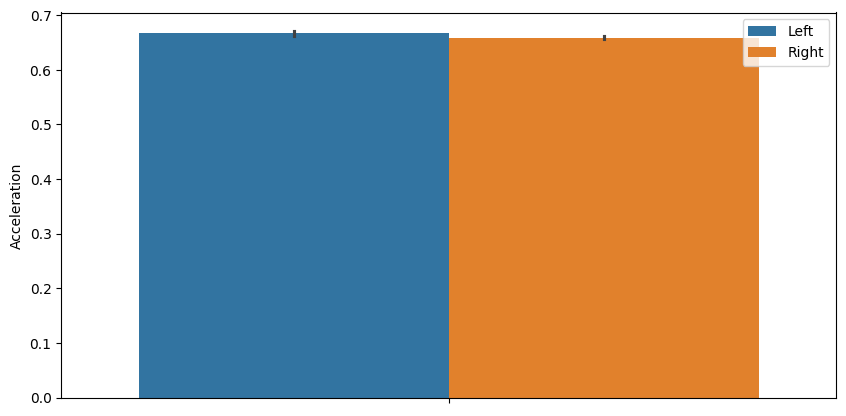

In [89]:
plt.figure(figsize=(10, 5))
sns.barplot(y=df_scaled['Acceleration'],hue='Preferred Foot', data=df)
plt.legend()
plt.show()
#the agility and acceleration also better with left leg

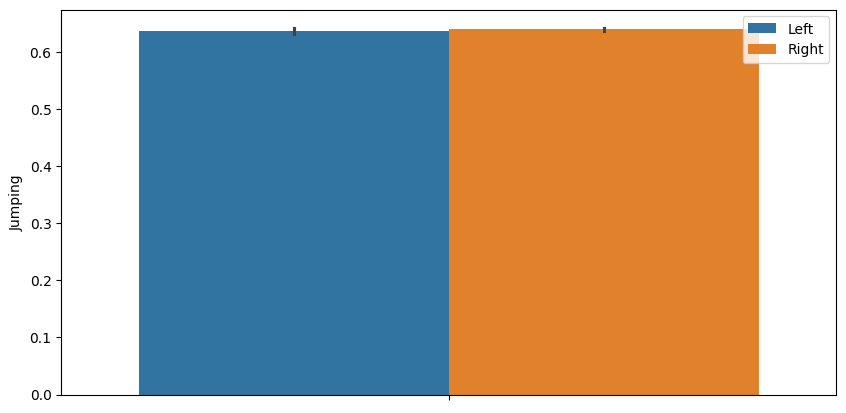

In [90]:
plt.figure(figsize=(10, 5))
sns.barplot(y=df_scaled['Jumping'],hue='Preferred Foot', data=df)
plt.legend()
plt.show()
#jummping better with right leg

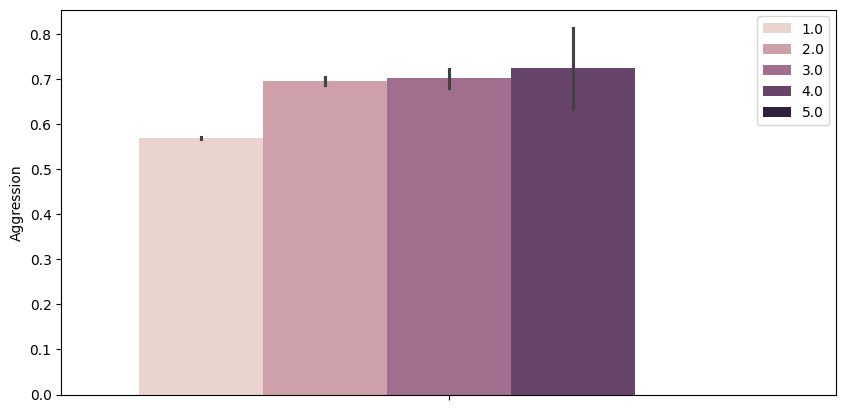

In [91]:

plt.figure(figsize=(10, 5))
sns.barplot(y=df_scaled['Aggression'],hue='International Reputation', data=df)
plt.legend()
plt.show()
#that the player who has the highest international reputation is less in aggression

<Axes: xlabel='Aggression', ylabel='Penalties'>

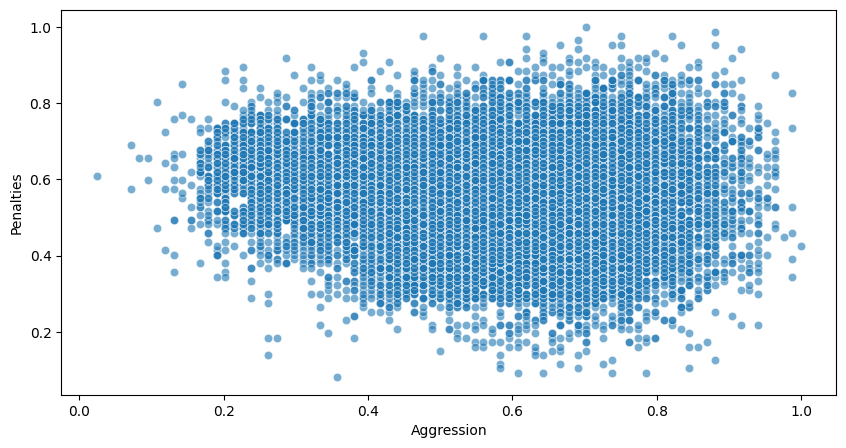

In [92]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Aggression', y='Penalties', data=df_scaled, alpha=0.6)
#it is a dircetly propotion relationship between aggression and penalties

<Axes: xlabel='StandingTackle', ylabel='Balance'>

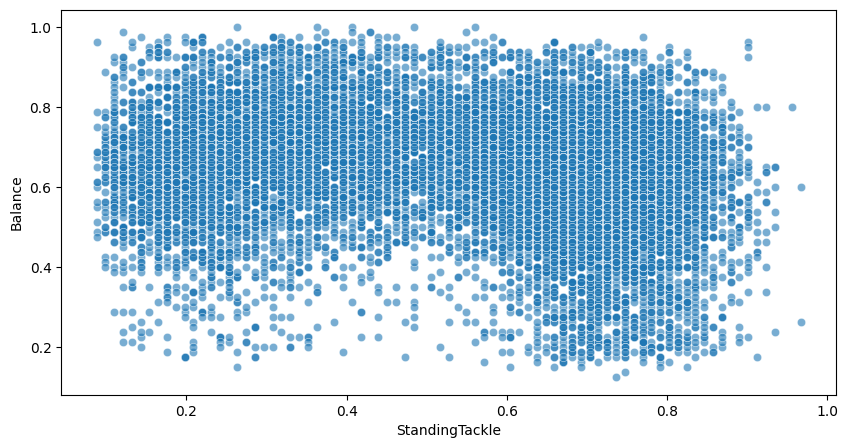

In [93]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='StandingTackle', y='Balance', data=df_scaled, alpha=0.6)
#balance and Standing Tackle are directly propotion

<ipython-input-94-db0622086322>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='GKReflexes', y='Agility', data=df_scaled, palette='viridis')


<Axes: xlabel='GKReflexes', ylabel='Agility'>

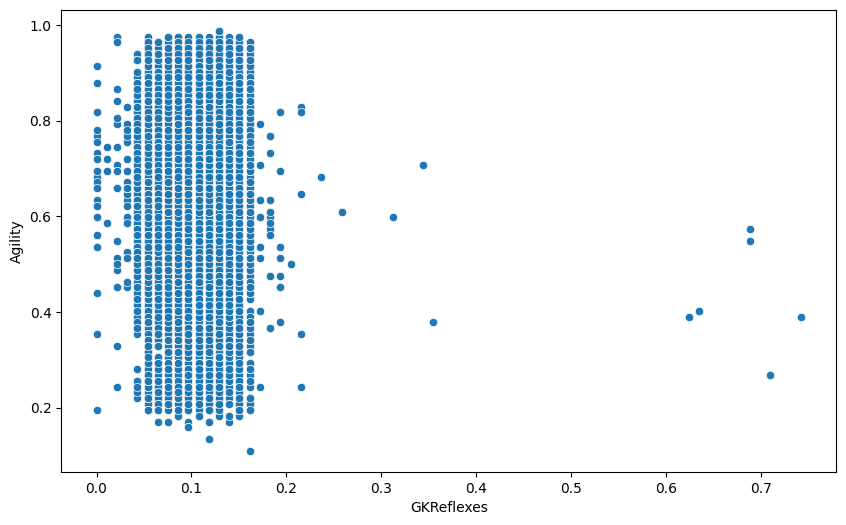

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GKReflexes', y='Agility', data=df_scaled, palette='viridis')
#goalkeeper's ability to react quickly to shots on goal, passes, or other fast-moving actions so it depends on the agility and his positioning
#players that have both agility and GKreflexes are little

<Axes: xlabel='International Reputation', ylabel='Release Clause'>

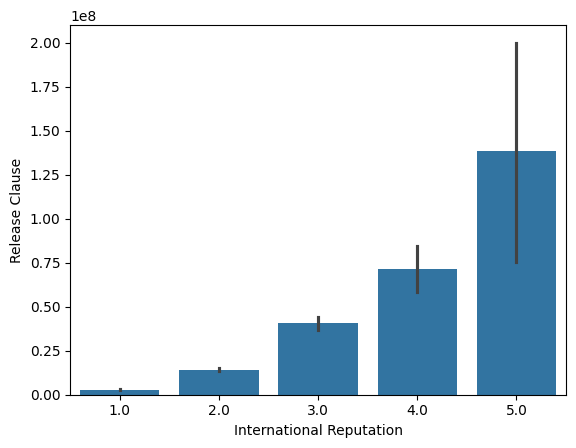

In [95]:
sns.barplot(x='International Reputation', y='Release Clause', data=df)
#the player with high international Reputation has highest Relase Clause

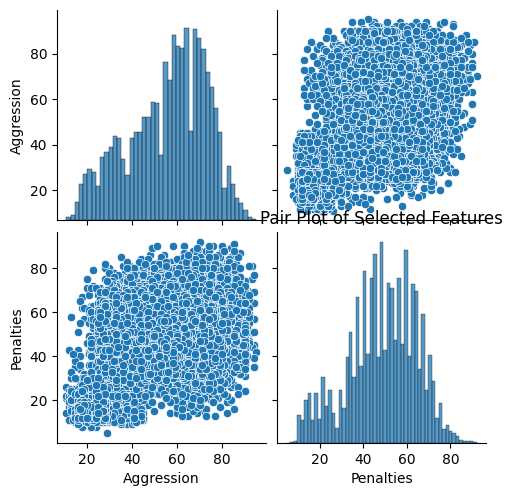

In [96]:
# Select a subset of columns for the pair plot
columns_to_plot = ['Aggression', 'Penalties']  # Example columns

sns.pairplot(df[columns_to_plot])
plt.title('Pair Plot of Selected Features')
plt.show()
#aggression and penalties are depend on each other

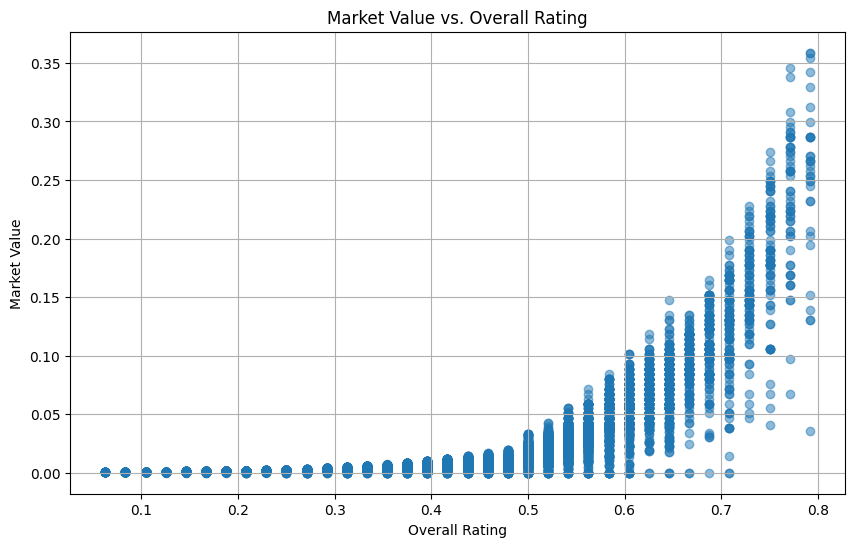

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['Overall'], df_scaled['Value'], alpha=0.5)
plt.title('Market Value vs. Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Market Value')
plt.grid(True)
plt.show()


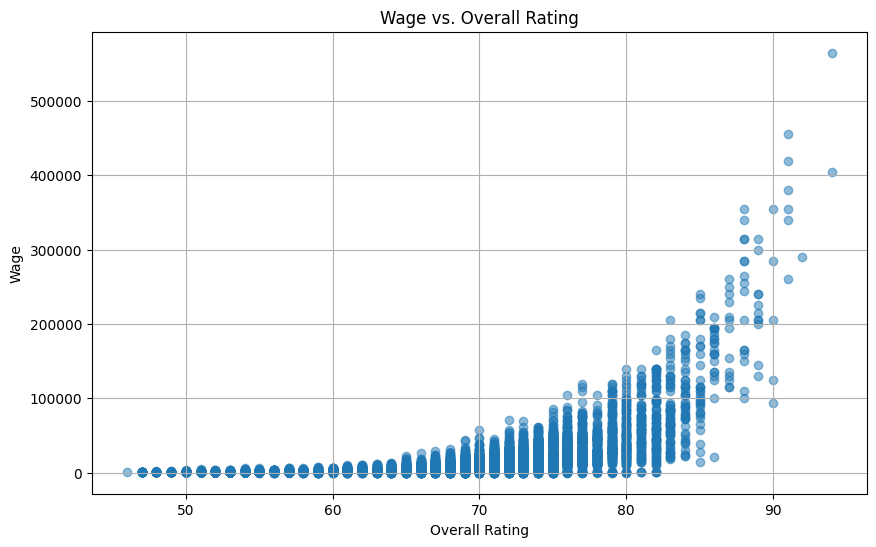

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Overall'], df['Wage'], alpha=0.5)
plt.title('Wage vs. Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Wage')
plt.grid(True)
plt.show()

The wages and value increase as the overall increases (how important the player is and certainly has one of the highest rates in the previous skills)

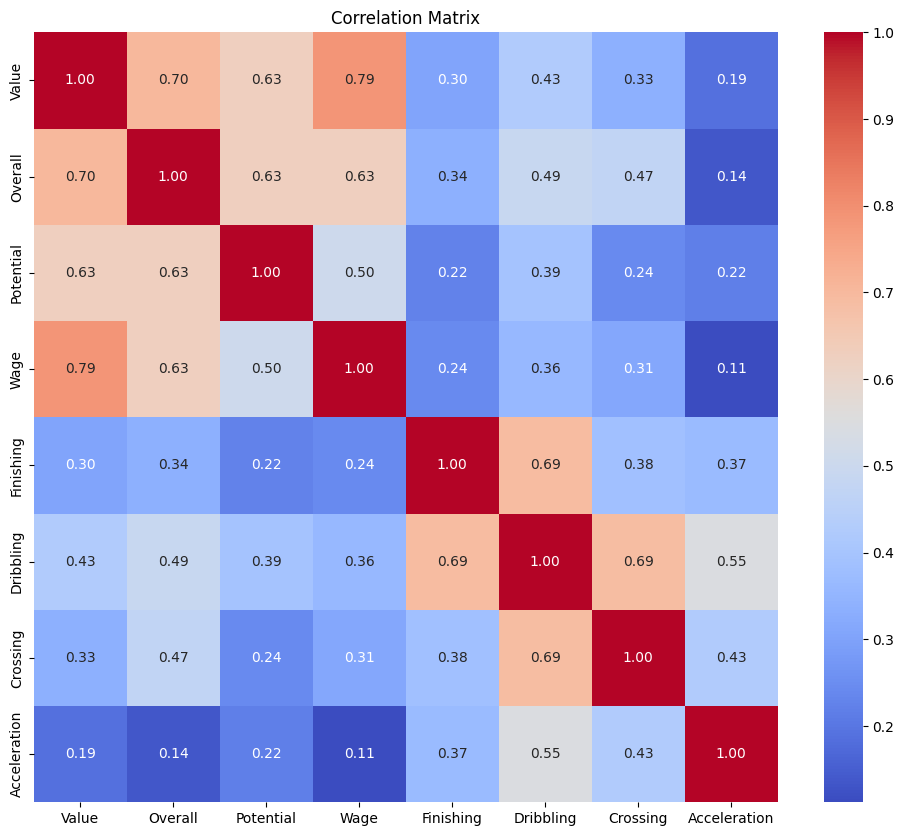

In [99]:
plt.figure(figsize=(12, 10))
corr = df_scaled[['Value', 'Overall', 'Potential', 'Wage', 'Finishing', 'Dribbling', 'Crossing', 'Acceleration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Compare among each other to see how different aspects of performance are related and how the skills affect the overall and value

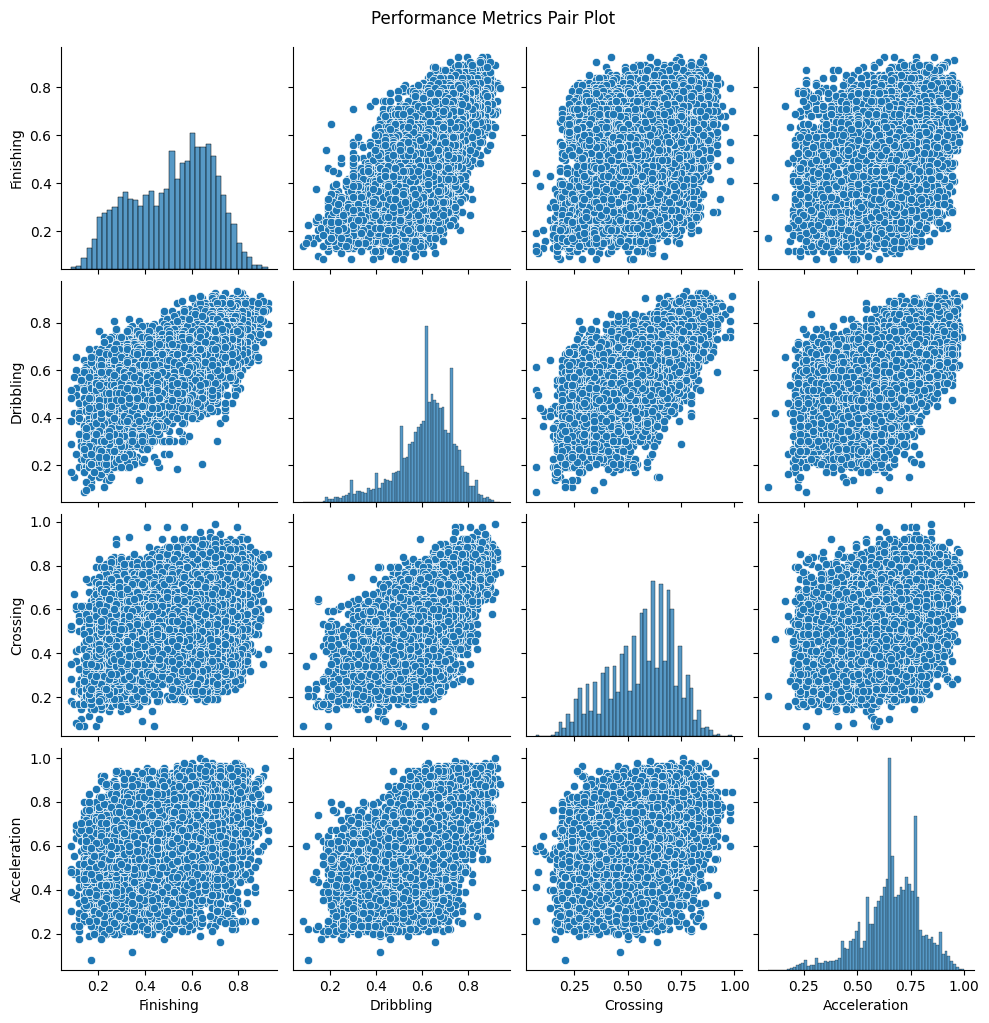

In [100]:
sns.pairplot(df_scaled[['Finishing', 'Dribbling', 'Crossing', 'Acceleration']])
plt.suptitle('Performance Metrics Pair Plot', y=1.02)
plt.show()
#how all skills relates to each other

#Split data into train and test

In [101]:
X = df_encoded.drop('Wage', axis=1)
y = df_encoded['Wage']
#split 80%train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#the target could be also overall (to check the performance of the player it depends on the application of the data set )